# Classifer 
Predicts a category or class label
Example: Spam vs Not Spam (Yes/No)

In [1]:
#Importing the libraries for data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Churn_Modelling dataset
df = pd.read_csv("c:/users/sakshi yadav/Downloads/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
country = {'France':0, 'Spain':1, 'Germany':2}
gender = {'Female':0, 'Male':1}
def countryEncode(val):
    return country[val]
def genderEncode(val):
    return gender[val]

In [14]:
df.Geography = df.Geography.map(countryEncode)

In [15]:
df.Gender = df.Gender.map(genderEncode)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
X = df.drop(columns=['Exited'])

In [18]:
y = df.Exited

In [19]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((8000, 10), (2000, 10), (2000,), (8000,))

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
lg = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(verbosity=0)
lgbm = LGBMClassifier(verbose=-1)
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
mlp = MLPClassifier(max_iter=500)

In [26]:
model = [lg,dtc,rfc,gbc,xgb,lgbm,svc,knn,nb,mlp]

In [27]:
for m in model:
    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    #Accuracy Score
    print(m, "Accuracy Score: ", round(accuracy_score(y_pred,y_test)* 100),'%')

LogisticRegression(max_iter=1000) Accuracy Score:  82 %
DecisionTreeClassifier() Accuracy Score:  78 %
RandomForestClassifier() Accuracy Score:  86 %
GradientBoostingClassifier() Accuracy Score:  86 %
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) Accuracy Score:  86 %
LGBMClassifier(v

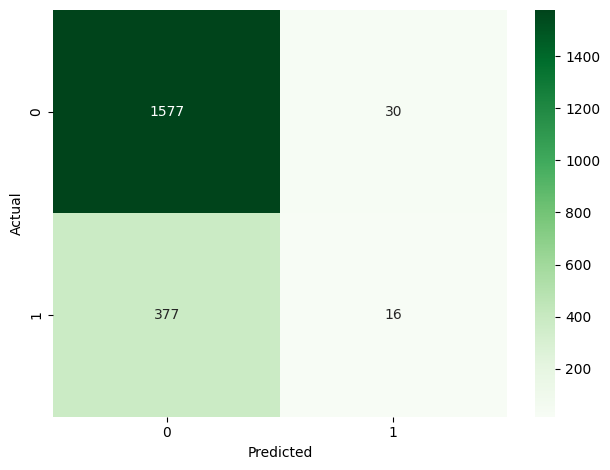

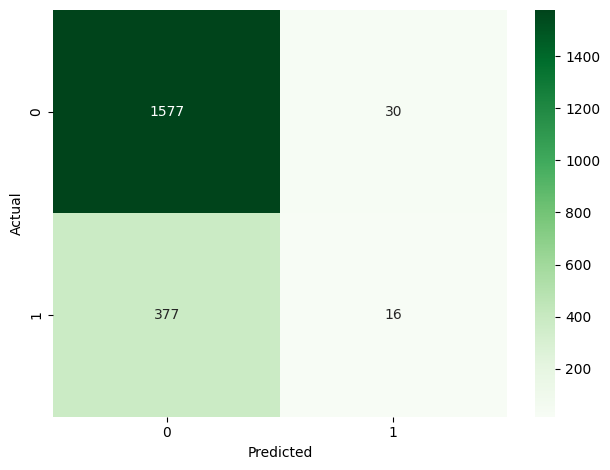

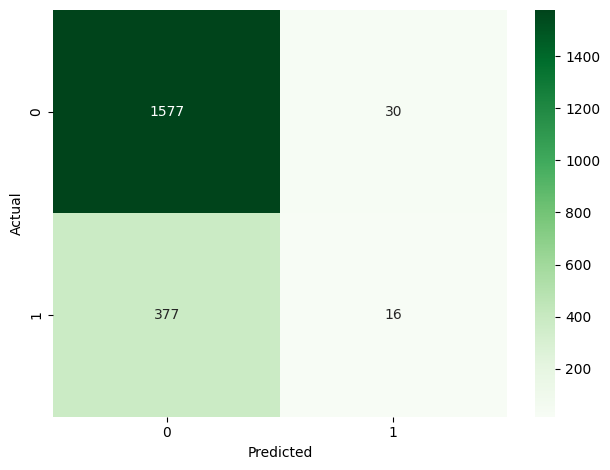

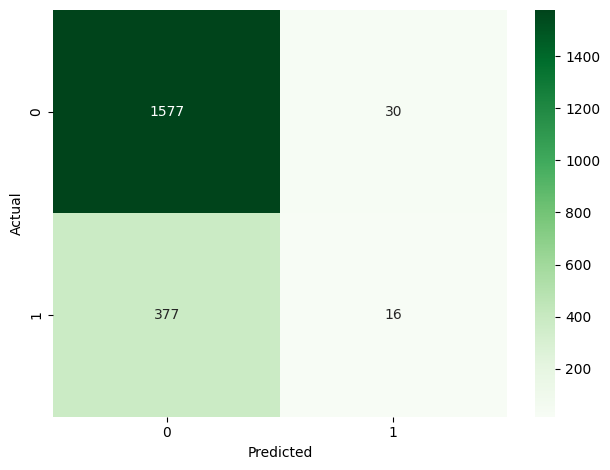

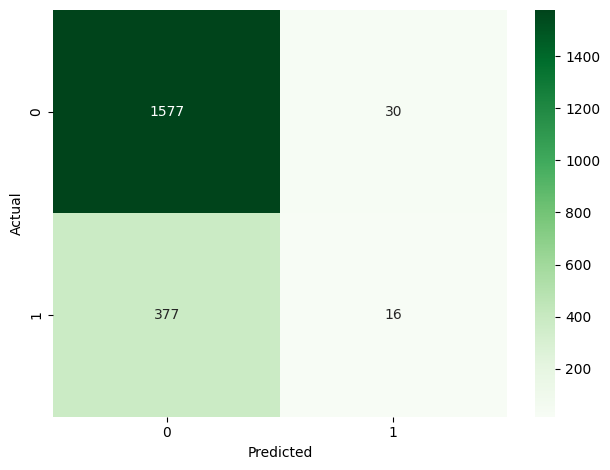

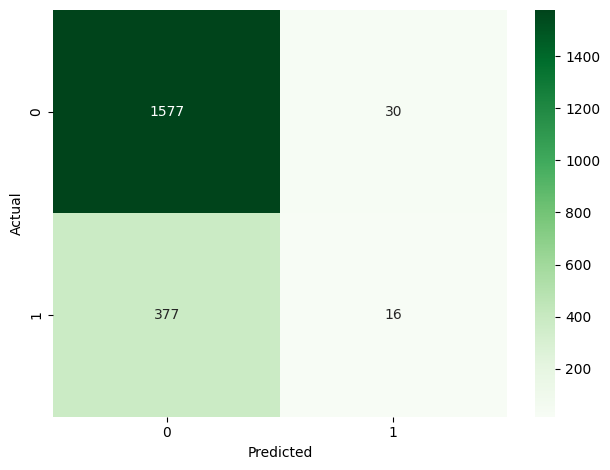

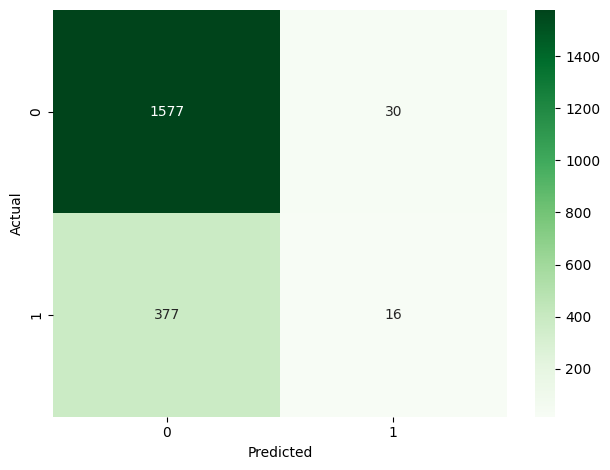

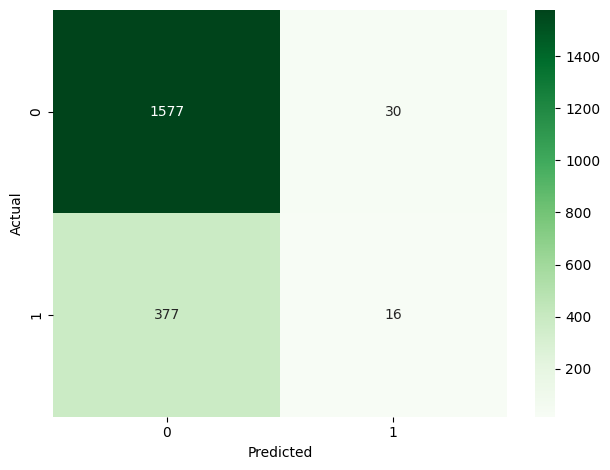

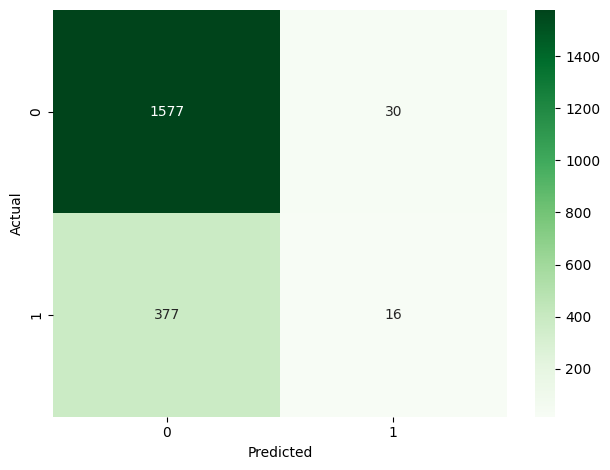

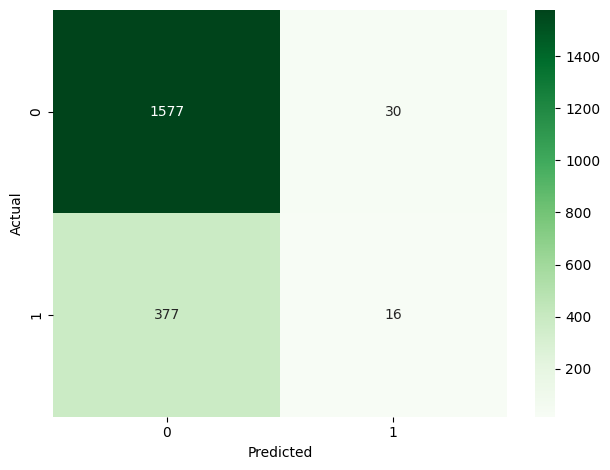

In [28]:
#Confusion Matrix and heatmap
for m in model:
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Regression:
Predicts the continuous value
Example: Stock Prices etc

In [29]:
df = pd.read_csv("c:/users/sakshi yadav/Downloads/Housing.csv")

In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
df.shape

(545, 13)

In [32]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [35]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [36]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [37]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [38]:
df.hotwaterheating.unique()

array(['no', 'yes'], dtype=object)

In [39]:
df.airconditioning.unique()

array(['yes', 'no'], dtype=object)

In [40]:
df.prefarea.unique()

array(['yes', 'no'], dtype=object)

In [41]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [42]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[yes_no_cols] = df[yes_no_cols].replace({'yes':1, 'no':0})

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [47]:
X = df.drop(columns=['price'])

In [48]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [49]:
y = df.price

In [50]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor

In [54]:
lg2 = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()
svr = SVR()
knr = KNeighborsRegressor()
mlpr =  MLPRegressor()

In [60]:
model = [lg2, dtr, rfr, xgbr, lgbmr, svr, knr, mlpr]
for m in model:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{m.__class__.__name__}")
    print(f"  MAE : {mae:.4f}")
    print(f"  MSE : {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

LinearRegression
  MAE : 979679.6913
  MSE : 1771751116594.0347
  RMSE: 1331071.4168
  R² Score: 0.6495

DecisionTreeRegressor
  MAE : 1254509.1743
  MSE : 2931206185779.8164
  RMSE: 1712076.5712
  R² Score: 0.4201

RandomForestRegressor
  MAE : 1015154.9269
  MSE : 1929795524575.5398
  RMSE: 1389170.8047
  R² Score: 0.6182

XGBRegressor
  MAE : 1062316.1250
  MSE : 2032404398080.0000
  RMSE: 1425624.2135
  R² Score: 0.5979

LGBMRegressor
  MAE : 1024869.5399
  MSE : 1932212253615.4648
  RMSE: 1390040.3784
  R² Score: 0.6177

SVR
  MAE : 1763890.2389
  MSE : 5567932065580.1172
  RMSE: 2359646.5976
  R² Score: -0.1016

KNeighborsRegressor
  MAE : 1315402.7523
  MSE : 3229592827614.6787
  RMSE: 1797106.7936
  R² Score: 0.3611

MLPRegressor
  MAE : 4842545.3673
  MSE : 28341639576175.0195
  RMSE: 5323686.6527
  R² Score: -4.6071

